In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.cluster.hierarchy import linkage, dendrogram

# Import Data

In [2]:
data = pd.read_csv('Data UMKM new.csv', delimiter=';')
data

,Nama sentra,Kode sentra,Alamat,Kecamatan,Kelurahan,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,SWK Kendung,NaN,Jl. raya Kendung,BENOWO,SEMEMI,213.63,9,7,0.7777777777777778,5,0.714286
1,SWK Ketabang,NaN,Jl. Inspeksi Ketabang Kali,GENTENG,EMBONG KALIASIN,569.30,38,38,1,38,1.000000
2,SWK Babat Jerawat,NaN,Jl. Raya Babat Jerawat,PAKAL,BABAT JERAWAT,1412.00,28,27,0.9642857142857143,27,1.000000
3,SWK Balas Klumprik,NaN,Jl. Balas Klumprik,WIYUNG,BALAS KLUMPRIK,560.00,15,11,0.7333333333333333,6,0.545455
4,SWK Bentul,NaN,Jl. Bentul,WONOKROMO,JAGIR,227.50,20,20,1,14,0.700000
5,SWK Bratang Binangun,NaN,Jl. Raya Manyar No. 80A,GUBENG,BARATAJAYA,2000.00,52,46,0.8846153846153846,41,0.891304
6,SWK Convention Hall,NaN,Jl. Arief Rahman Hakim No.131-133. Keputih. Ke...,SUKOLILO,GEBANG PUTIH,960.00,40,37,0.925,20,0.540541
7,SWK Deles Merr,NaN,Arif Rahman Hakim No.14 Kelurahan Klampis Ngasem,SUKOLILO,KLAMPIS NGASEM,890.00,36,31,0.8611111111111112,25,0.806452
8,SWK Dharmahusada,NaN,Pojok Timur. Jl. Dharmahusada. Mulyorejo. Kec....,GUBENG,MOJO,350.00,21,34,1.619.047.619.047.610,32,0.941176
9,SWK Dharmawangsa,NaN,Jl. Raya Dharmawangsa,GUBENG,AIRLANGGA,500.00,26,25,0.9615384615384616,25,1.000000


# Cek Tipe Data

In [3]:
data.dtypes

Nama sentra                                                        object
Kode sentra                                                       float64
Alamat                                                             object
Kecamatan                                                          object
Kelurahan                                                          object
Luas sentra (m2)                                                  float64
Kapasitas                                                           int64
Jumlah pelaku usaha                                                 int64
Okupansi sentra (%)                                                object
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah          int64
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah    float64
dtype: object

# Cek Missing Value Data

In [4]:
data.isna().sum()

Nama sentra                                                        0
Kode sentra                                                       48
Alamat                                                             0
Kecamatan                                                          0
Kelurahan                                                          0
Luas sentra (m2)                                                   2
Kapasitas                                                          0
Jumlah pelaku usaha                                                0
Okupansi sentra (%)                                                0
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah         0
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah     0
dtype: int64

# Replace Missing Value

In [5]:
mean = data["Luas sentra (m2)"].mean()
data["Luas sentra (m2)"] = data["Luas sentra (m2)"].replace(np.nan, mean)
data

,Nama sentra,Kode sentra,Alamat,Kecamatan,Kelurahan,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Okupansi sentra (%),Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,SWK Kendung,NaN,Jl. raya Kendung,BENOWO,SEMEMI,213.63000,9,7,0.7777777777777778,5,0.714286
1,SWK Ketabang,NaN,Jl. Inspeksi Ketabang Kali,GENTENG,EMBONG KALIASIN,569.30000,38,38,1,38,1.000000
2,SWK Babat Jerawat,NaN,Jl. Raya Babat Jerawat,PAKAL,BABAT JERAWAT,1412.00000,28,27,0.9642857142857143,27,1.000000
3,SWK Balas Klumprik,NaN,Jl. Balas Klumprik,WIYUNG,BALAS KLUMPRIK,560.00000,15,11,0.7333333333333333,6,0.545455
4,SWK Bentul,NaN,Jl. Bentul,WONOKROMO,JAGIR,227.50000,20,20,1,14,0.700000
5,SWK Bratang Binangun,NaN,Jl. Raya Manyar No. 80A,GUBENG,BARATAJAYA,2000.00000,52,46,0.8846153846153846,41,0.891304
6,SWK Convention Hall,NaN,Jl. Arief Rahman Hakim No.131-133. Keputih. Ke...,SUKOLILO,GEBANG PUTIH,960.00000,40,37,0.925,20,0.540541
7,SWK Deles Merr,NaN,Arif Rahman Hakim No.14 Kelurahan Klampis Ngasem,SUKOLILO,KLAMPIS NGASEM,890.00000,36,31,0.8611111111111112,25,0.806452
8,SWK Dharmahusada,NaN,Pojok Timur. Jl. Dharmahusada. Mulyorejo. Kec....,GUBENG,MOJO,350.00000,21,34,1.619.047.619.047.610,32,0.941176
9,SWK Dharmawangsa,NaN,Jl. Raya Dharmawangsa,GUBENG,AIRLANGGA,500.00000,26,25,0.9615384615384616,25,1.000000


In [6]:
data.isna().sum()

Nama sentra                                                        0
Kode sentra                                                       48
Alamat                                                             0
Kecamatan                                                          0
Kelurahan                                                          0
Luas sentra (m2)                                                   0
Kapasitas                                                          0
Jumlah pelaku usaha                                                0
Okupansi sentra (%)                                                0
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah         0
Persentase pelaku usaha yang omzetnya lebih dari 1 juta rupiah     0
dtype: int64

# Menghapus beberapa variabel untuk melakukan pemodelan

In [7]:
all_data = data.drop(data.columns[[0, 1, 2, 3, 4, 8, 10]], axis=1)
all_data

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,213.63000,9,7,5
1,569.30000,38,38,38
2,1412.00000,28,27,27
3,560.00000,15,11,6
4,227.50000,20,20,14
5,2000.00000,52,46,41
6,960.00000,40,37,20
7,890.00000,36,31,25
8,350.00000,21,34,32
9,500.00000,26,25,25


# Normalisasi Data

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

norm_all = pd.DataFrame(scaled_data, columns = all_data.columns)
norm_all

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah
0,-1.162807,-1.128038,-1.090876,-0.898956
1,-0.241640,0.423571,0.860114,1.462481
2,1.940910,-0.111466,0.167827,0.675335
3,-0.265727,-0.807015,-0.839135,-0.827398
4,-1.126885,-0.539496,-0.272719,-0.254928
5,3.463800,1.172624,1.363595,1.677157
6,0.770253,0.530579,0.797178,0.174424
7,0.588957,0.316564,0.419568,0.532218
8,-0.809616,-0.485992,0.608373,1.033129
9,-0.421123,-0.218474,0.041957,0.532218


# Tiga plot Dendrogram menggunakan metode Hierarchical Clustering dengan algoritma yang berbeda: Complete Linkage, Single Linkage, Average Linkage, dan Ward Lingkage.

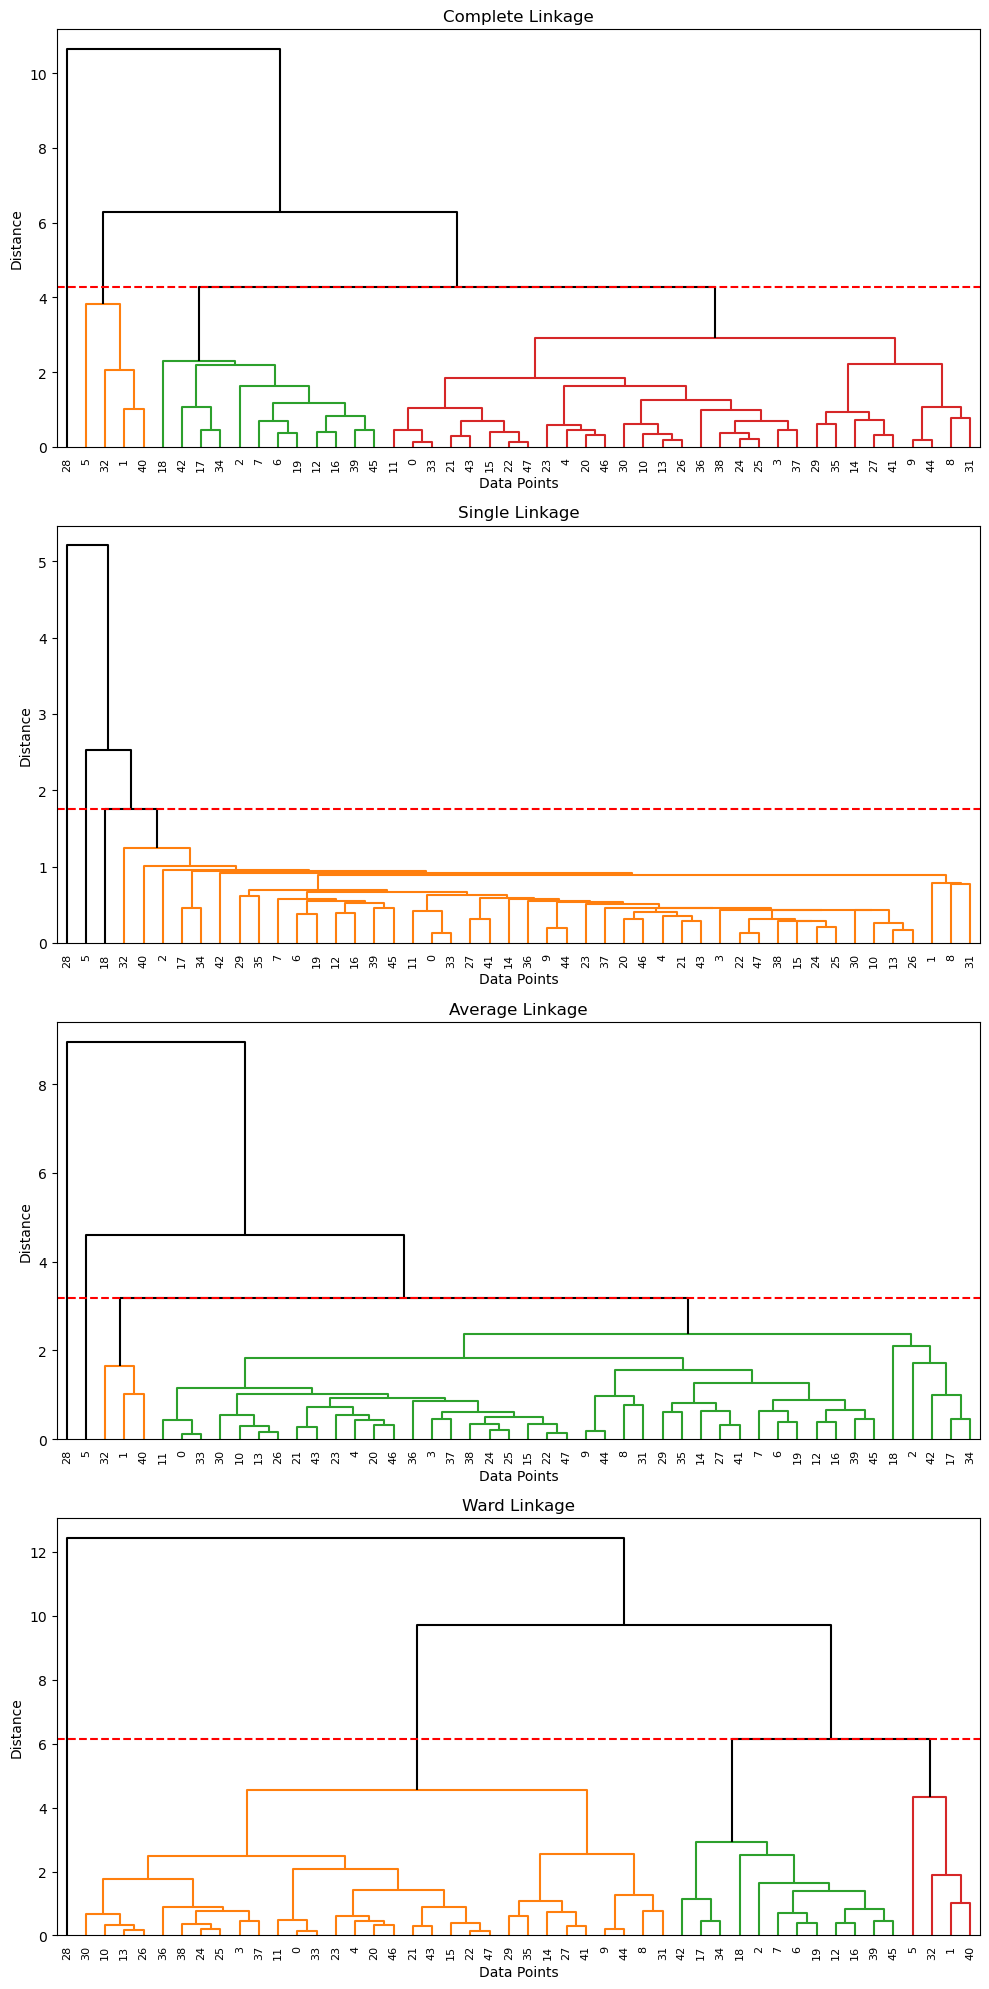

In [9]:
# Methods to compare
methods = ["complete", "single", "average", "ward"]
linkages = []

# Calculate linkage for each method
for method in methods:
    Z = linkage(norm_all, method=method, metric="euclidean")
    linkages.append(Z)

# Plot dendrograms
fig, axs = plt.subplots(len(methods), 1, figsize=(10, 5 * len(methods)))

for i, method in enumerate(methods):
    dendrogram(
        linkages[i],
        ax=axs[i],
        color_threshold=linkages[i][-3, 2],  # Threshold to get 3 clusters
        above_threshold_color='k',  # Color above threshold
    )
    axs[i].axhline(y=linkages[i][-3, 2], color='r', linestyle='--')
    axs[i].set_title(f'{method.capitalize()} Linkage')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Penentuan jarak pengukuran kemiripan terbaik dan algoritma yang optimal

In [10]:
# Methods to compare
methods = ["complete", "single", "average", "ward"]
coph_dists = []

# Calculate linkage for each method and cophenetic correlation
for method in methods:
    Z = linkage(norm_all, method=method, metric="euclidean")
    coph_corr, _ = cophenet(Z, pdist(norm_all))
    coph_dists.append(coph_corr)
    print(f'Cophenetic Correlation ({method.capitalize()} Linkage with 3 clusters): {coph_corr}')
    
    
# Methods to compare
methods = ["complete", "single", "average", "ward"]
coph_dists = []

# Calculate cophenetic correlation for each method
for method in methods:
    Z = linkage(norm_all, method=method, metric="euclidean")
    coph_corr, _ = cophenet(Z, pdist(norm_all))
    coph_dists.append(coph_corr)

# Find the method with the highest cophenetic correlation
best_method_index = np.argmax(coph_dists)
best_method = methods[best_method_index]
print(f'\nMetode terbaik berdasarkan korelasi cophenetic: {best_method.capitalize()}')

Cophenetic Correlation (Complete Linkage with 3 clusters): 0.8734222458448064
Cophenetic Correlation (Single Linkage with 3 clusters): 0.9110825597575473
Cophenetic Correlation (Average Linkage with 3 clusters): 0.9316557257704047
Cophenetic Correlation (Ward Linkage with 3 clusters): 0.6367901375285793

Metode terbaik berdasarkan korelasi cophenetic: Average


# Menentukan jumlah cluster yang representatif dalam proses clustering dengan metode silhouette coefficient 

In [11]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

silhouette_scores = []

for i, method in enumerate(methods):
    # Get cluster labels
    cluster_labels = fcluster(linkages[i], t=3, criterion='maxclust')
    
    # Calculate Silhouette Coefficient
    score = silhouette_score(norm_all, cluster_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Coefficient ({method.capitalize()} Linkage with 3 clusters): {score:}')

Silhouette Coefficient (Complete Linkage with 3 clusters): 0.4863640135712055
Silhouette Coefficient (Single Linkage with 3 clusters): 0.5461427795818711
Silhouette Coefficient (Average Linkage with 3 clusters): 0.5461427795818711
Silhouette Coefficient (Ward Linkage with 3 clusters): 0.3953925426607006


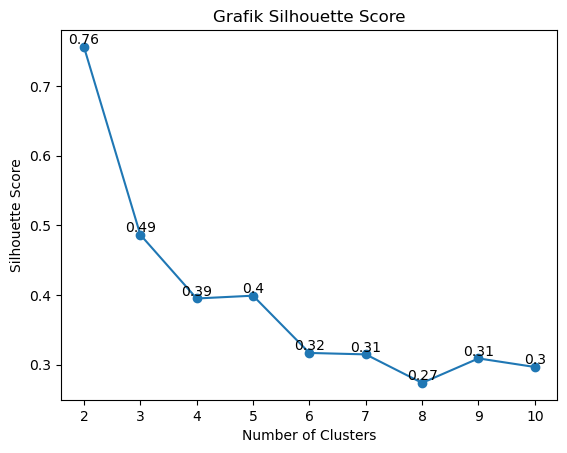

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_cluster in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
    cluster_labels = clusterer.fit_predict(norm_all)
    silhouette_avg = silhouette_score(norm_all, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method
plt.plot(range(2, 11), silhouette_scores, marker='o')
for i, score in enumerate(silhouette_scores):
    plt.text(i + 2, score, round(score, 2), ha='center', va='bottom')  
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Grafik Silhouette Score')
plt.show()

# Count member Average Linkage Cluster

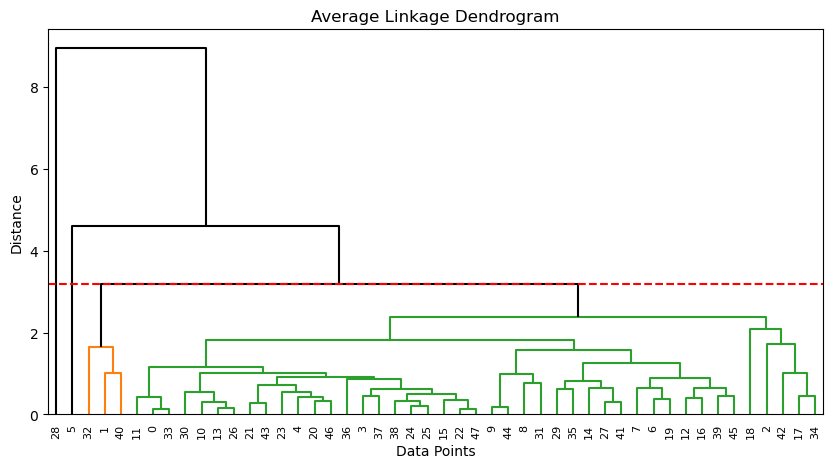

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,1
1,-0.241640,0.423571,0.860114,1.462481,1
2,1.940910,-0.111466,0.167827,0.675335,1
3,-0.265727,-0.807015,-0.839135,-0.827398,1
4,-1.126885,-0.539496,-0.272719,-0.254928,1
5,3.463800,1.172624,1.363595,1.677157,2
6,0.770253,0.530579,0.797178,0.174424,1
7,0.588957,0.316564,0.419568,0.532218,1
8,-0.809616,-0.485992,0.608373,1.033129,1
9,-0.421123,-0.218474,0.041957,0.532218,1


In [27]:
# Method to compare
method = "average"

# Calculate linkage for the single linkage method
Z_single = linkage(norm_all, method=method, metric="euclidean")

# Determine clusters; here, t=3 is used to get 3 clusters, you can change t to other values
cluster_labels_average = fcluster(Z_single, t=3, criterion='maxclust')

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 5))
dendrogram(
    Z_single,
    color_threshold=Z_single[-3, 2],  # Threshold to get 3 clusters
    above_threshold_color='k',  # Color above threshold
)
plt.axhline(y=Z_single[-3, 2], color='r', linestyle='--')
plt.title(f'Average Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Create DataFrame with norm_all and cluster labels
# If norm_all is a DataFrame
if isinstance(norm_all, pd.DataFrame):
    data_average_clusters = norm_all.copy()
    data_average_clusters['Cluster'] = cluster_labels_average
else:
    # If norm_all is a NumPy array
    data_average_clusters = pd.DataFrame(norm_all)
    data_average_clusters['Cluster'] = cluster_labels_average

data_average_clusters

In [15]:
count_average = data_average_clusters['Cluster'].value_counts().sort_index()
count_average

Cluster
1    46
2     1
3     1
Name: count, dtype: int64

# Count member Complete Linkage Cluster

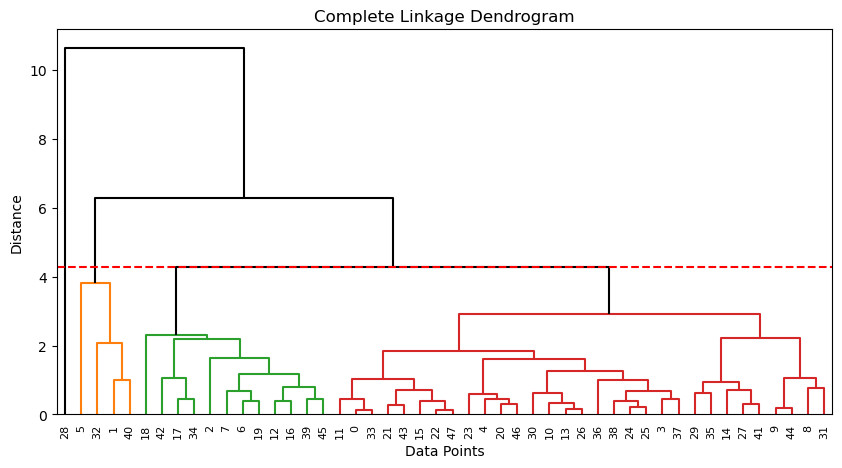

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,2
1,-0.241640,0.423571,0.860114,1.462481,1
2,1.940910,-0.111466,0.167827,0.675335,2
3,-0.265727,-0.807015,-0.839135,-0.827398,2
4,-1.126885,-0.539496,-0.272719,-0.254928,2
5,3.463800,1.172624,1.363595,1.677157,1
6,0.770253,0.530579,0.797178,0.174424,2
7,0.588957,0.316564,0.419568,0.532218,2
8,-0.809616,-0.485992,0.608373,1.033129,2
9,-0.421123,-0.218474,0.041957,0.532218,2


In [26]:
# Method to compare
method = "complete"

# Calculate linkage for the single linkage method
Z_single = linkage(norm_all, method=method, metric="euclidean")

# Determine clusters; here, t=3 is used to get 3 clusters, you can change t to other values
cluster_labels_complete = fcluster(Z_single, t=3, criterion='maxclust')

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 5))
dendrogram(
    Z_single,
    color_threshold=Z_single[-3, 2],  # Threshold to get 3 clusters
    above_threshold_color='k',  # Color above threshold
)
plt.axhline(y=Z_single[-3, 2], color='r', linestyle='--')
plt.title(f'Complete Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Create DataFrame with norm_all and cluster labels
# If norm_all is a DataFrame
if isinstance(norm_all, pd.DataFrame):
    data_complete_clusters = norm_all.copy()
    data_complete_clusters['Cluster'] = cluster_labels_complete
else:
    # If norm_all is a NumPy array
    data_complete_clusters = pd.DataFrame(norm_all)
    data_complete_clusters['Cluster'] = cluster_labels_complete

data_complete_clusters

In [17]:
data_complete_clusters.to_csv('cluster_complete.csv', index=False)

# Count member Ward Linkage Cluster

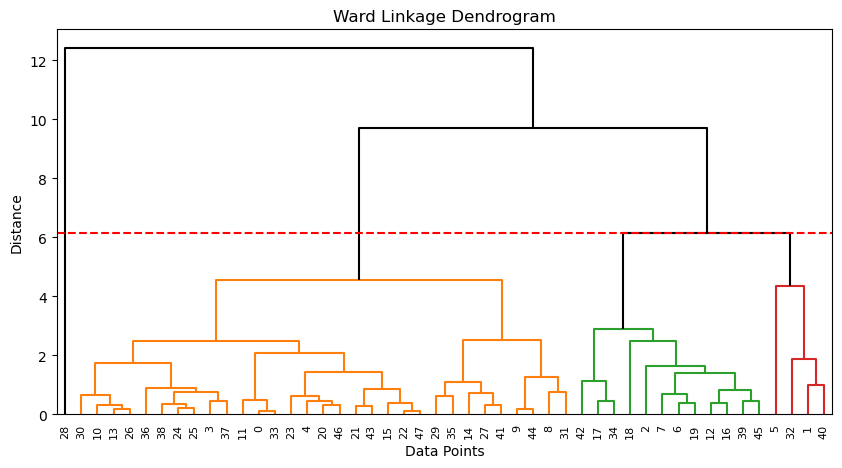

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,1
1,-0.241640,0.423571,0.860114,1.462481,2
2,1.940910,-0.111466,0.167827,0.675335,2
3,-0.265727,-0.807015,-0.839135,-0.827398,1
4,-1.126885,-0.539496,-0.272719,-0.254928,1
5,3.463800,1.172624,1.363595,1.677157,2
6,0.770253,0.530579,0.797178,0.174424,2
7,0.588957,0.316564,0.419568,0.532218,2
8,-0.809616,-0.485992,0.608373,1.033129,1
9,-0.421123,-0.218474,0.041957,0.532218,1


In [28]:
# Method to compare
method = "ward"

# Calculate linkage for the single linkage method
Z_single = linkage(norm_all, method=method, metric="euclidean")

# Determine clusters; here, t=3 is used to get 3 clusters, you can change t to other values
cluster_labels_ward = fcluster(Z_single, t=3, criterion='maxclust')

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 5))
dendrogram(
    Z_single,
    color_threshold=Z_single[-3, 2],  # Threshold to get 3 clusters
    above_threshold_color='k',  # Color above threshold
)
plt.axhline(y=Z_single[-3, 2], color='r', linestyle='--')
plt.title(f'Ward Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Create DataFrame with norm_all and cluster labels
# If norm_all is a DataFrame
if isinstance(norm_all, pd.DataFrame):
    data_ward_clusters = norm_all.copy()
    data_ward_clusters['Cluster'] = cluster_labels_ward
else:
    # If norm_all is a NumPy array
    data_ward_clusters = pd.DataFrame(norm_all)
    data_ward_clusters['Cluster'] = cluster_labels_ward

data_ward_clusters

In [22]:
data_ward_clusters.to_csv('cluster_ward.csv', index=False)

# Count member Single Linkage Cluster

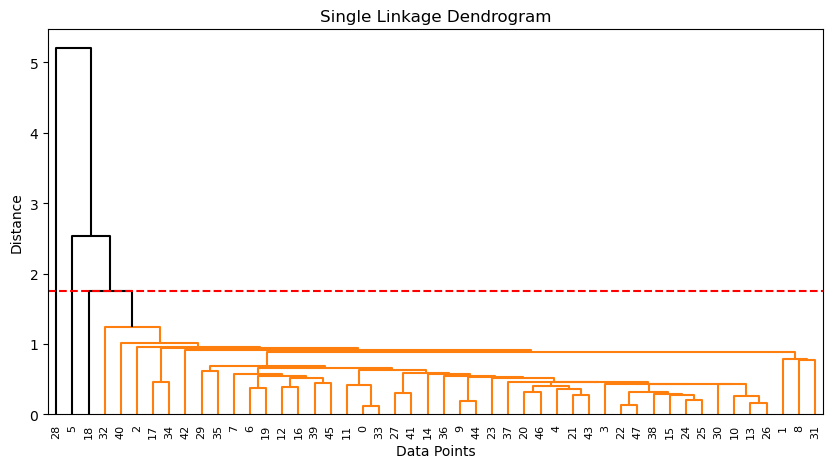

,Luas sentra (m2),Kapasitas,Jumlah pelaku usaha,Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah,Cluster
0,-1.162807,-1.128038,-1.090876,-0.898956,1
1,-0.241640,0.423571,0.860114,1.462481,1
2,1.940910,-0.111466,0.167827,0.675335,1
3,-0.265727,-0.807015,-0.839135,-0.827398,1
4,-1.126885,-0.539496,-0.272719,-0.254928,1
5,3.463800,1.172624,1.363595,1.677157,2
6,0.770253,0.530579,0.797178,0.174424,1
7,0.588957,0.316564,0.419568,0.532218,1
8,-0.809616,-0.485992,0.608373,1.033129,1
9,-0.421123,-0.218474,0.041957,0.532218,1


In [23]:
# Method to compare
method = "single"

# Calculate linkage for the single linkage method
Z_single = linkage(norm_all, method=method, metric="euclidean")

# Determine clusters; here, t=3 is used to get 3 clusters, you can change t to other values
cluster_labels_single = fcluster(Z_single, t=3, criterion='maxclust')

# Plot dendrogram for single linkage
plt.figure(figsize=(10, 5))
dendrogram(
    Z_single,
    color_threshold=Z_single[-3, 2],  # Threshold to get 3 clusters
    above_threshold_color='k',  # Color above threshold
)
plt.axhline(y=Z_single[-3, 2], color='r', linestyle='--')
plt.title(f'Single Linkage Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Create DataFrame with norm_all and cluster labels
# If norm_all is a DataFrame
if isinstance(norm_all, pd.DataFrame):
    data_with_clusters = norm_all.copy()
    data_with_clusters['Cluster'] = cluster_labels_single
else:
    # If norm_all is a NumPy array
    data_with_clusters = pd.DataFrame(norm_all)
    data_with_clusters['Cluster'] = cluster_labels_single

data_with_clusters

In [24]:
count_single = data_with_clusters['Cluster'].value_counts().sort_index()
count_single

Cluster
1    46
2     1
3     1
Name: count, dtype: int64

# Rata-rata tiap variabel berdasarkan cluster

In [18]:
# Filter baris dengan cluster '1'
cluster_1 = data_complete_clusters[data_complete_clusters['Cluster'] == 1]

# Hapus kolom 'cluster' dari DataFrame cluster_1
cluster_1 = cluster_1.drop('Cluster', axis=1)

# Hitung rata-rata dari kolom-kolom dalam cluster '1'
rata_rata_cluster_1 = cluster_1.mean()

# Hitung rata-rata dari rata-rata variabel dalam cluster '0'
rata_rata_total_cluster_1 = rata_rata_cluster_1.mean()


# Tampilkan rata-rata
print("Rata-rata Kolom dalam Cluster '1':")
print(rata_rata_cluster_1)

# Tampilkan rata-rata total dari rata-rata variabel dalam cluster '0'
print(f'\nRata-rata Total dari Rata-rata Variabel dalam Cluster 1 : {rata_rata_total_cluster_1:.6f}')

Rata-rata Kolom dalam Cluster '1':
Luas sentra (m2)                                              0.803857
Kapasitas                                                     1.186000
Jumlah pelaku usaha                                           1.410796
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah    1.712937
dtype: float64

Rata-rata Total dari Rata-rata Variabel dalam Cluster 1 : 1.278397


In [19]:
# Filter baris dengan cluster '2'
cluster_2 = data_complete_clusters[data_complete_clusters['Cluster'] == 2]

# Hapus kolom 'cluster' dari DataFrame cluster_2
cluster_2 = cluster_2.drop('Cluster', axis=1)

# Hitung rata-rata dari kolom-kolom dalam cluster '2'
rata_rata_cluster_2 = cluster_2.mean()

# Hitung rata-rata dari rata-rata variabel dalam cluster '2'
rata_rata_total_cluster_2 = rata_rata_cluster_2.mean()


# Tampilkan rata-rata
print("Rata-rata Kolom dalam Cluster '2':")
print(rata_rata_cluster_2)

# Tampilkan rata-rata total dari rata-rata variabel dalam cluster '2'
print(f'\nRata-rata Total dari Rata-rata Variabel dalam Cluster 2 : {rata_rata_total_cluster_2:.6f}')

Rata-rata Kolom dalam Cluster '2':
Luas sentra (m2)                                             -0.091534
Kapasitas                                                    -0.232161
Jumlah pelaku usaha                                          -0.250765
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah   -0.266577
dtype: float64

Rata-rata Total dari Rata-rata Variabel dalam Cluster 2 : -0.210259


In [20]:
# Filter baris dengan cluster '2'
cluster_3 = data_complete_clusters[data_complete_clusters['Cluster'] == 3]

# Hapus kolom 'cluster' dari DataFrame cluster_2
cluster_3 = cluster_3.drop('Cluster', axis=1)

# Hitung rata-rata dari kolom-kolom dalam cluster '2'
rata_rata_cluster_3 = cluster_3.mean()

# Hitung rata-rata dari rata-rata variabel dalam cluster '2'
rata_rata_total_cluster_3 = rata_rata_cluster_3.mean()


# Tampilkan rata-rata
print("Rata-rata Kolom dalam Cluster '3':")
print(rata_rata_cluster_3)

# Tampilkan rata-rata total dari rata-rata variabel dalam cluster '2'
print(f'\nRata-rata Total dari Rata-rata Variabel dalam Cluster 3 : {rata_rata_total_cluster_3:.6f}')

Rata-rata Kolom dalam Cluster '3':
Luas sentra (m2)                                              0.720526
Kapasitas                                                     5.238910
Jumlah pelaku usaha                                           5.139703
Jumlah pelaku usaha yang omzetnya lebih dari 1 juta rupiah    4.611064
dtype: float64

Rata-rata Total dari Rata-rata Variabel dalam Cluster 3 : 3.927551
